<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: kriging standard 2D </font>
</div>

- **Fecha**: 2023/03/28
        
- **Objetivos**: 2D standard Kriging 
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [22]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 50
rcParams['lines.markersize']=10
rcParams['image.cmap']='hot'
rcParams['figure.figsize']=(8,8)

%matplotlib widget


# Theoretical variogram 



In [23]:
import ipywidgets as widgets

In [24]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import theoretical
#from phyton_kriging.variogram_2D import theoretical
from phyton_kriging.standard_2D import kriging2D
from phyton_kriging.convolution_2D import Convolution_2D

## Variograma 1D

In [25]:
h = np.linspace(0, 20, 1000)

name = gauss

h: min - 0.0, max - 20.0
variogram: min - 0.0001, max - 0.9981695458637723
parameters = {'sc': 0.01, 'A': 1, 'lc': 8, 'power': None}



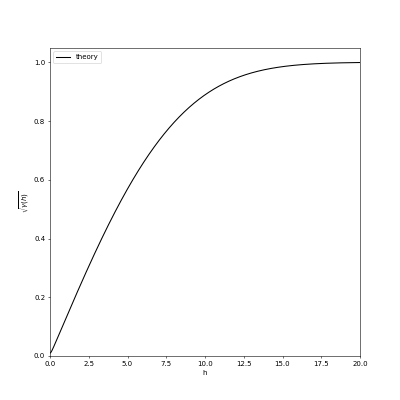

In [26]:
sc = 0.01
I0 = .001

# var_theo = theoretical(h=h, make_2D=False)
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=8)
var_theo.draw()
print(var_theo)

In [27]:
def f_signal(x, y, sc=0, I0=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        y (np.array): y_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    z = x+y
    z = np.sin(2 * np.pi * x / 10) * np.sin(2 * np.pi * y / 10)+x/20
    z = np.exp(-(x**2+y**2)/(2*2**2))
    z = z + sc * np.random.randn(num_sensors)
    z = z + 2 * I0 * (np.random.rand(num_sensors) - 0.5)

    return z

In [28]:
num_x = num_y = 50
num_sensors = num_x * num_y

sensors = np.zeros((num_sensors, 4), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
y = -10 + 20 * np.random.rand(num_sensors)

x0 = np.linspace(-10, 10, num_x)
y0 = np.linspace(-10, 10, num_y)
X,Y=np.meshgrid(x0,y0)
x = X.flatten()
y= Y.flatten()


sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = f_signal(x,y,sc,I0)
sensors[:, 3] = sc * np.ones_like(x)

sensors[:, 2] = sensors[:, 2] + sensors[:, 3] * np.random.randn(num_sensors)


In [29]:
num_sampling = 50**2
num_x = num_y = int(np.sqrt(num_sampling))
x_sampling = np.linspace(-10, 10, num_x)
y_sampling = np.linspace(-10, 10, num_y)
sampling2D=(x_sampling, y_sampling)

X_sampling2D, Y_sampling2D = np.meshgrid(x_sampling, y_sampling)
print(X_sampling2D.shape)
z_ideal_sampling = f_signal(X_sampling2D, Y_sampling2D, 0, 0)
Sampling2D = (X_sampling2D, Y_sampling2D)
print(z_ideal_sampling.shape)

(50, 50)
(50, 50)


## Convolution

In [30]:
krig2 = Convolution_2D(sensors=sensors,
                       variogram=var_theo,
                       sampling=sampling2D,
                       y_ideal=z_ideal_sampling)


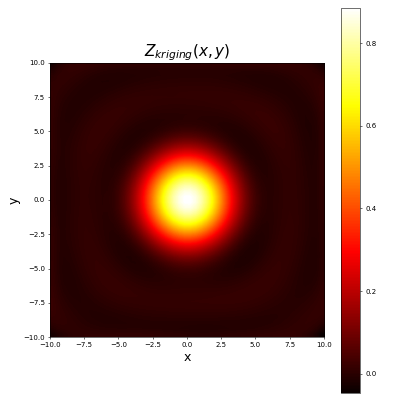

In [31]:
krig2.draw('kriging', circles=False)

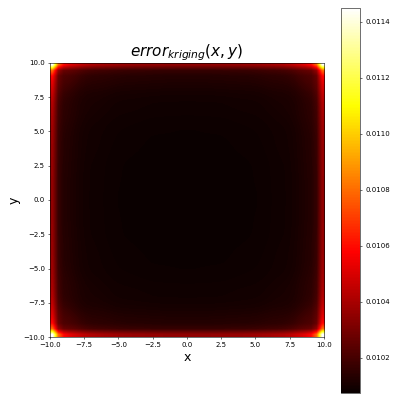

In [32]:
krig2.draw('error_kriging', circles=False)

In [33]:
krig2.compute_DM()
krig2.normalize_DM()


In [34]:
print(krig2.sampling[0].shape)

(50,)


In [35]:
krig2.compute_error_convolution()

(50,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
krig2.Lambda = krig2.DM

In [ ]:
krig2.compute_NEQ()

TypeError: samplingXY() got an unexpected keyword argument 'sampling'

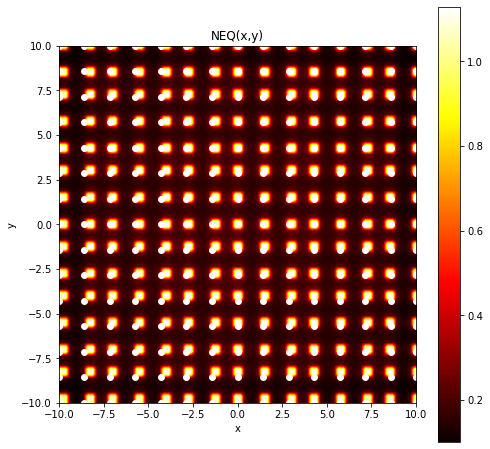

In [ ]:
krig2.draw('NEQ')

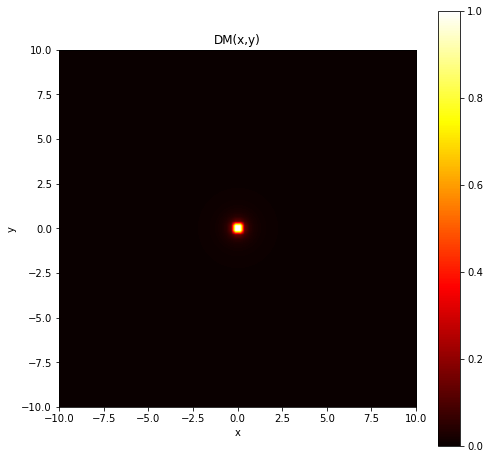

In [ ]:
krig2.draw('DM')

In [ ]:
krig2.compute_error_convolution()

0.01


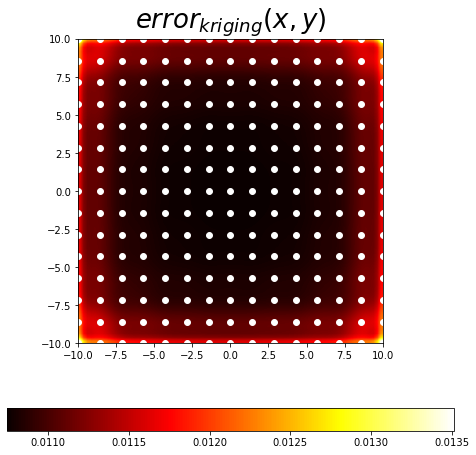

In [ ]:
krig2.draw('error_kriging')

(80, 80)


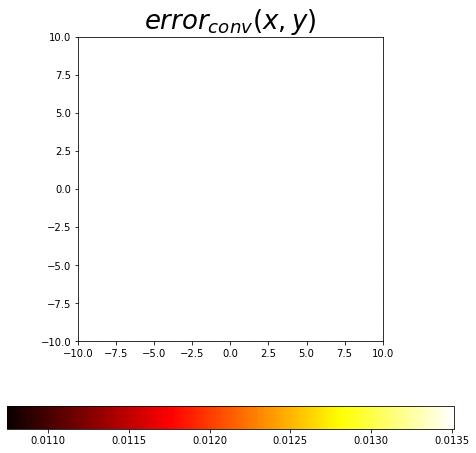

In [ ]:
krig2.draw('error_convolution')

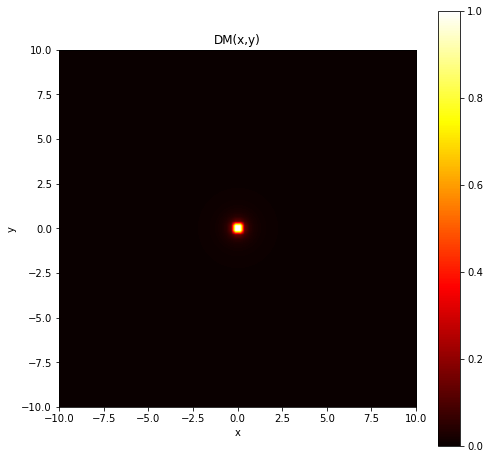

In [ ]:
krig2.draw('kriging', cmap='hot', circles=False)

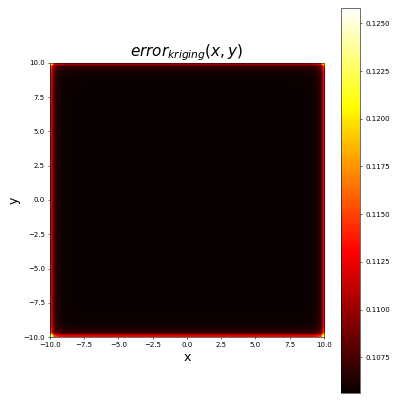

In [ ]:
krig2.draw('DM')

In [ ]:
krig2.center_lambdas()
krig2.compute_DM()
krig2.normalize_DM()
krig2.compute_NEQ()


/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/media/luismiguel/mas_datos/bitbucket/phyton_kriging/phyton_kriging/convolution_2D.py:173: RuntimeWarning: Mean of empty slice
  Lambda = np.nanmean(lambdas_centered, axis=2)
/media/luismiguel/mas_datos/bitbucket/phyton_kriging/phyton_kriging/convolution_2D.py:179: RuntimeWarning: Mean of empty slice
  Lambda = np.nanmean(lambdas_centered, axis=2)


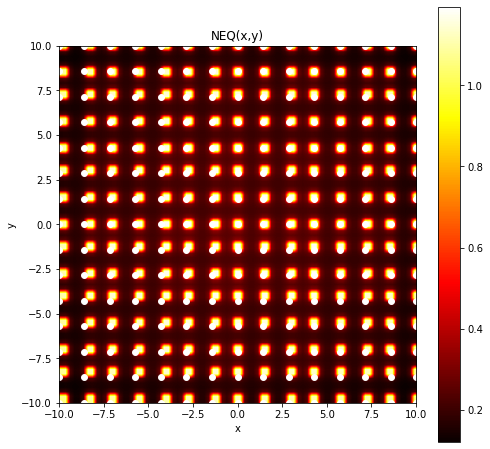

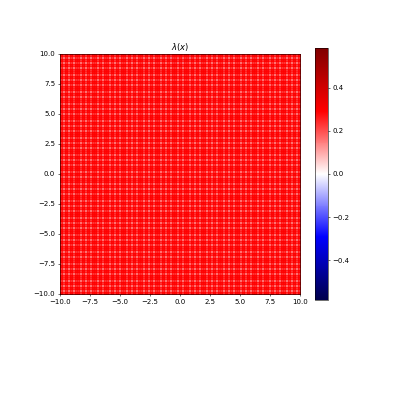

In [ ]:
krig2.draw('NEQ')

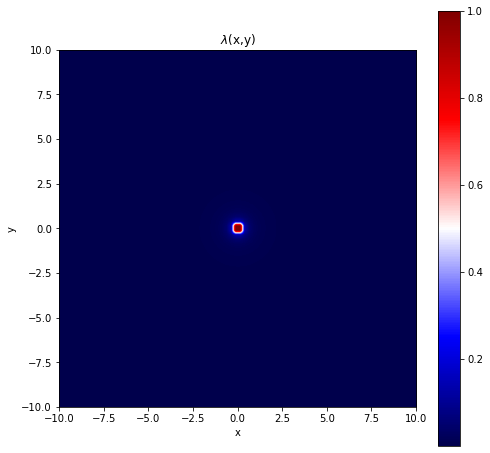

In [ ]:
krig2.draw('error_kriging', circles=False)

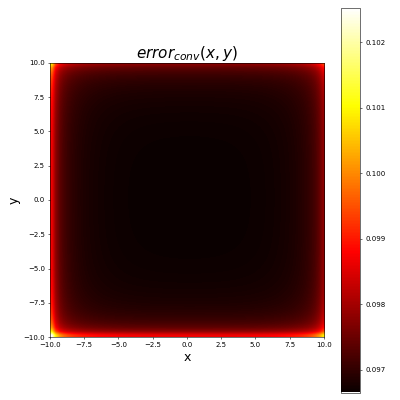

In [ ]:
krig2.draw('Lambda')

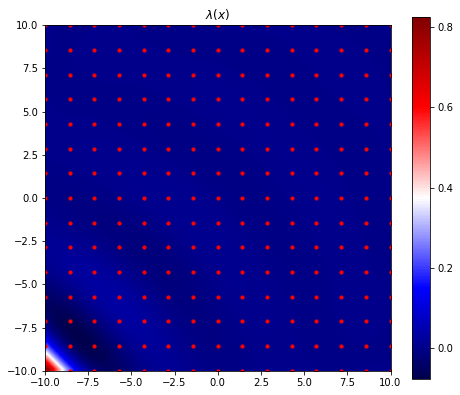

In [ ]:
krig2.draw('NEQ', circles=False)

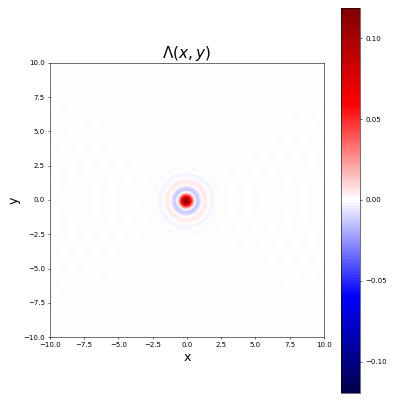

In [ ]:
krig2.draw('lambdas')

In [ ]:
krig2.draw('lambdas_centered')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/media/luismiguel/mas_datos/bitbucket/phyton_kriging/phyton_kriging/convolution_2D.py:173: RuntimeWarning: Mean of empty slice
  Lambda = np.nanmean(lambdas_centered, axis=2)
/media/luismiguel/mas_datos/bitbucket/phyton_kriging/phyton_kriging/convolution_2D.py:179: RuntimeWarning: Mean of empty slice
  Lambda = np.nanmean(lambdas_centered, axis=2)


0.17853377539523155


interactive(children=(IntSlider(value=4999, description='i', max=9999), Output()), _dom_classes=('widget-inter…

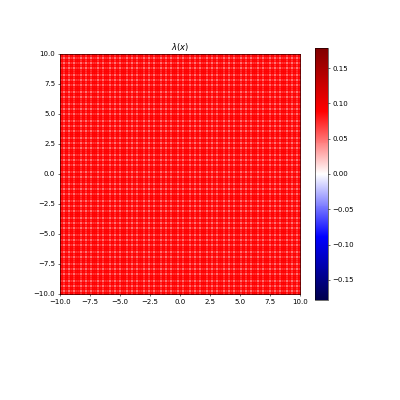

In [ ]:
X, lambda_mean, LAMBDAS = krig2.center_lambdas()

plt.plot(X, LAMBDAS)
plt.plot(X, lambda_mean,'k', lw=2)